In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pandas as pd

In [2]:

df = pd.read_csv("../data/cleaned_tweets_with_labels_v_b64.csv", lineterminator='\n', parse_dates=True)

# Filter out rows where the country is "United States of America" or "United States"
df_filtered = df[df["country"].isin(["United States of America", "United States"])]

len(df_filtered)

356478

In [3]:
# Group by political label and count tweets in each category
political_groups = df_filtered.groupby("political_label").size().sort_values(ascending=False)
# Display the results

print(political_groups)

# Sum of tweets of all political labels using the political_groups variable
total_tweets = political_groups.sum()
print(f"Total tweets in political labels: {total_tweets}")

political_label
Non-Political       303583
Voting Rights        17898
Healthcare            7917
Taxes                 5022
Foreign Policy        4164
Criminal Justice      3325
Immigration           2322
Unemployment          2045
Climate Change        1710
Education             1481
Free Speech           1365
Energy Policy         1149
LGBTQ Rights          1113
Abortion               740
Welfare                669
Gun Control            596
Police Reform          583
Social Security        333
Minimum Wage           292
Student Loans           92
Inflation               79
dtype: int64
Total tweets in political labels: 356478


In [71]:
# in df_filtered, all the datapoints which have no state replace them with "Unknown"
df_filtered.loc[:, "state"] = df_filtered["state"].fillna("Unknown")

# For each political_label group, group tweets by state and count the number of tweets in each state
grouped_by_state = df_filtered.groupby(["political_label", "state"]).size().reset_index(name="tweet_count")
# Sort the grouped data by political_label and tweet_count
grouped_by_state = grouped_by_state.sort_values(by=["political_label", "tweet_count"], ascending=[True, False])
# Display the grouped data

print(grouped_by_state.to_string(index=False))

 political_label                    state  tweet_count
        Abortion               California          754
        Abortion                  Unknown          723
        Abortion                 New York          450
        Abortion                    Texas          360
        Abortion                  Florida          350
        Abortion                 Illinois          160
        Abortion     District of Columbia          148
        Abortion             Pennsylvania          143
        Abortion               New Jersey          116
        Abortion            Massachusetts          114
        Abortion                     Ohio           98
        Abortion                 Michigan           95
        Abortion                  Arizona           90
        Abortion           North Carolina           86
        Abortion                 Colorado           80
        Abortion                 Missouri           80
        Abortion               Washington           71
        Ab

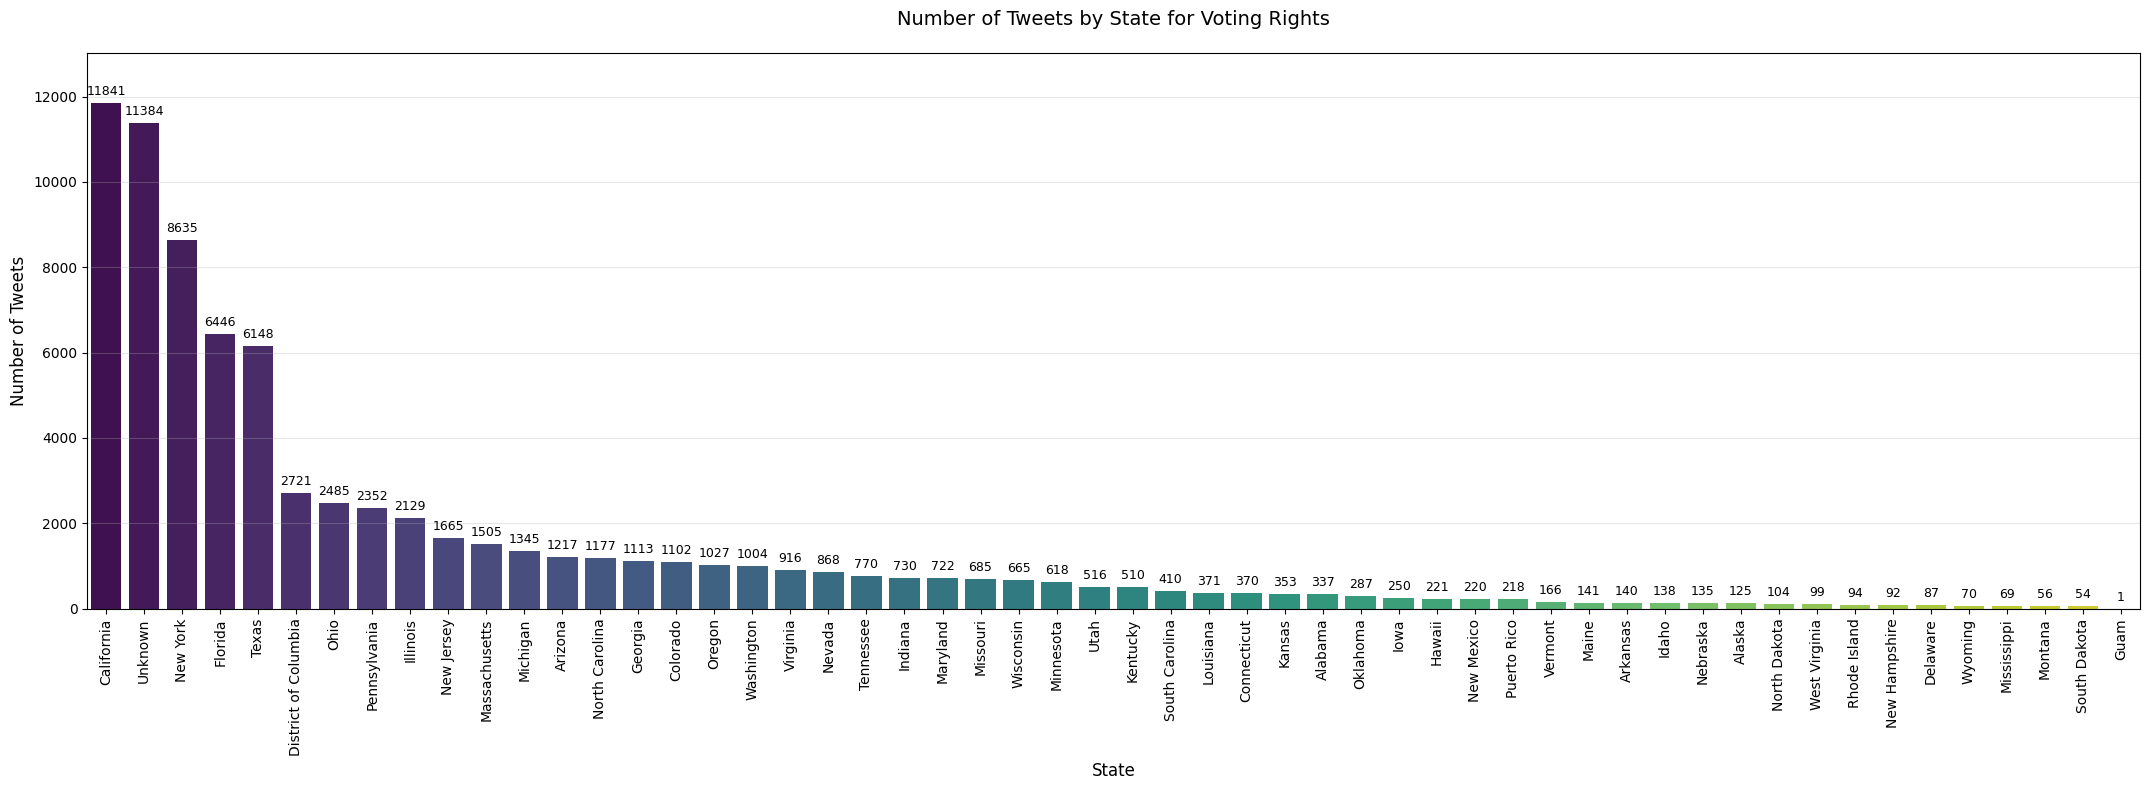

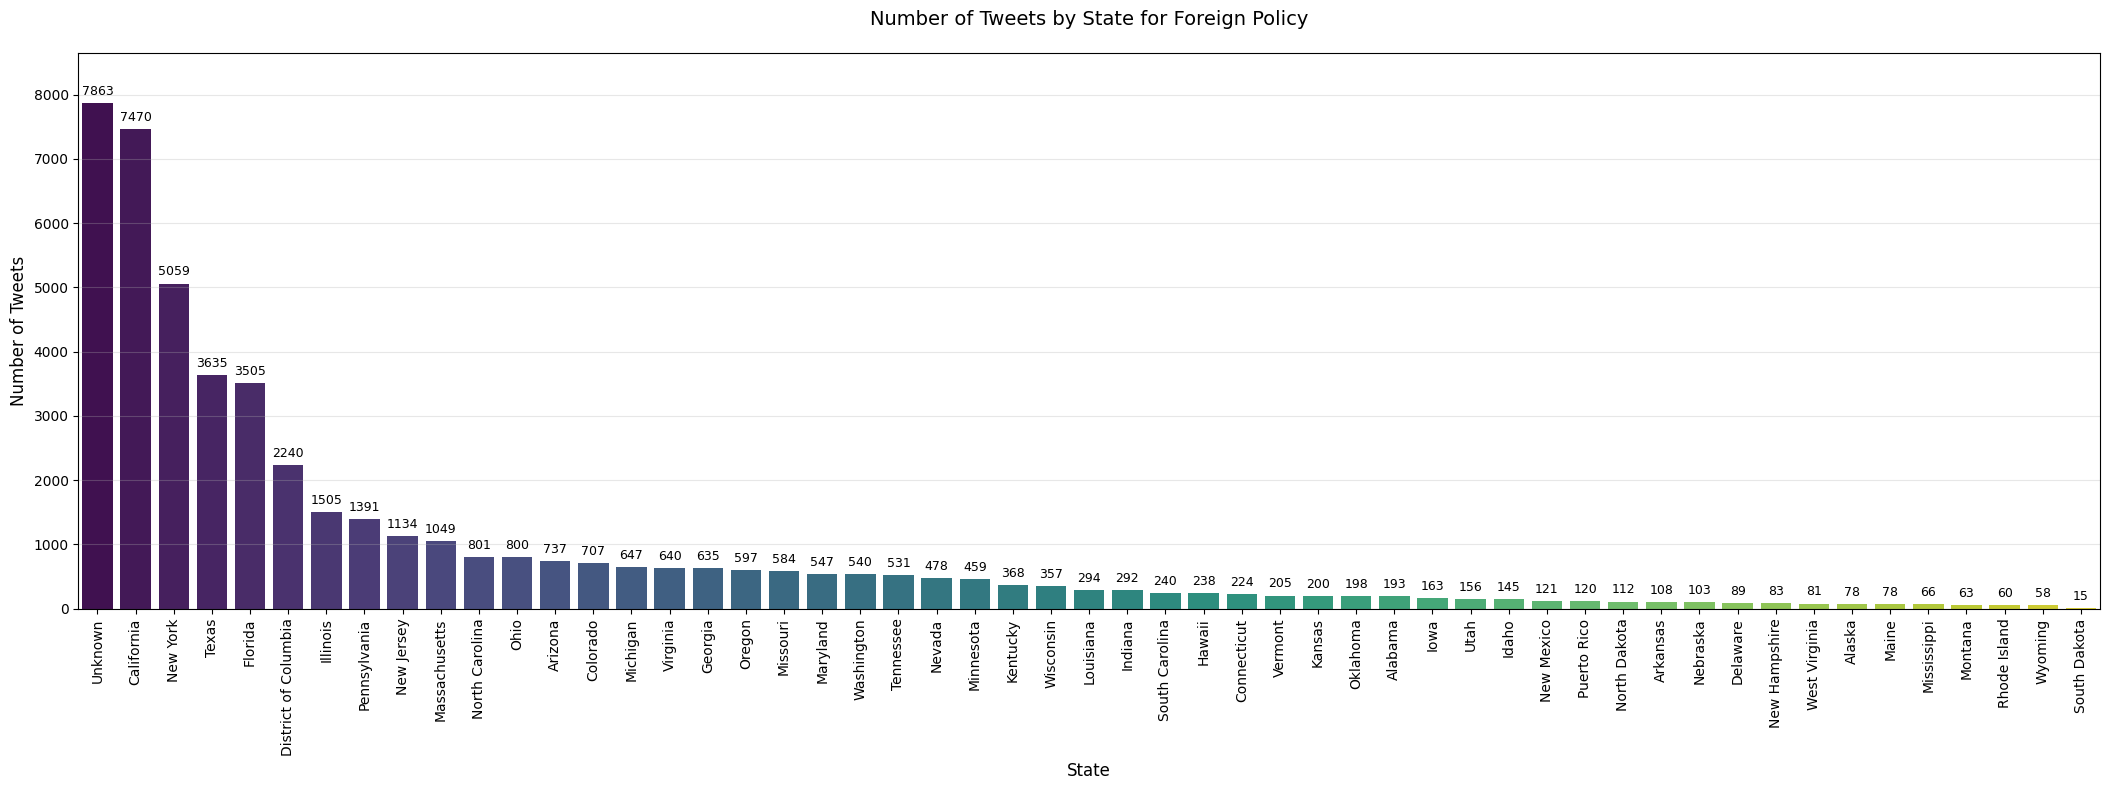

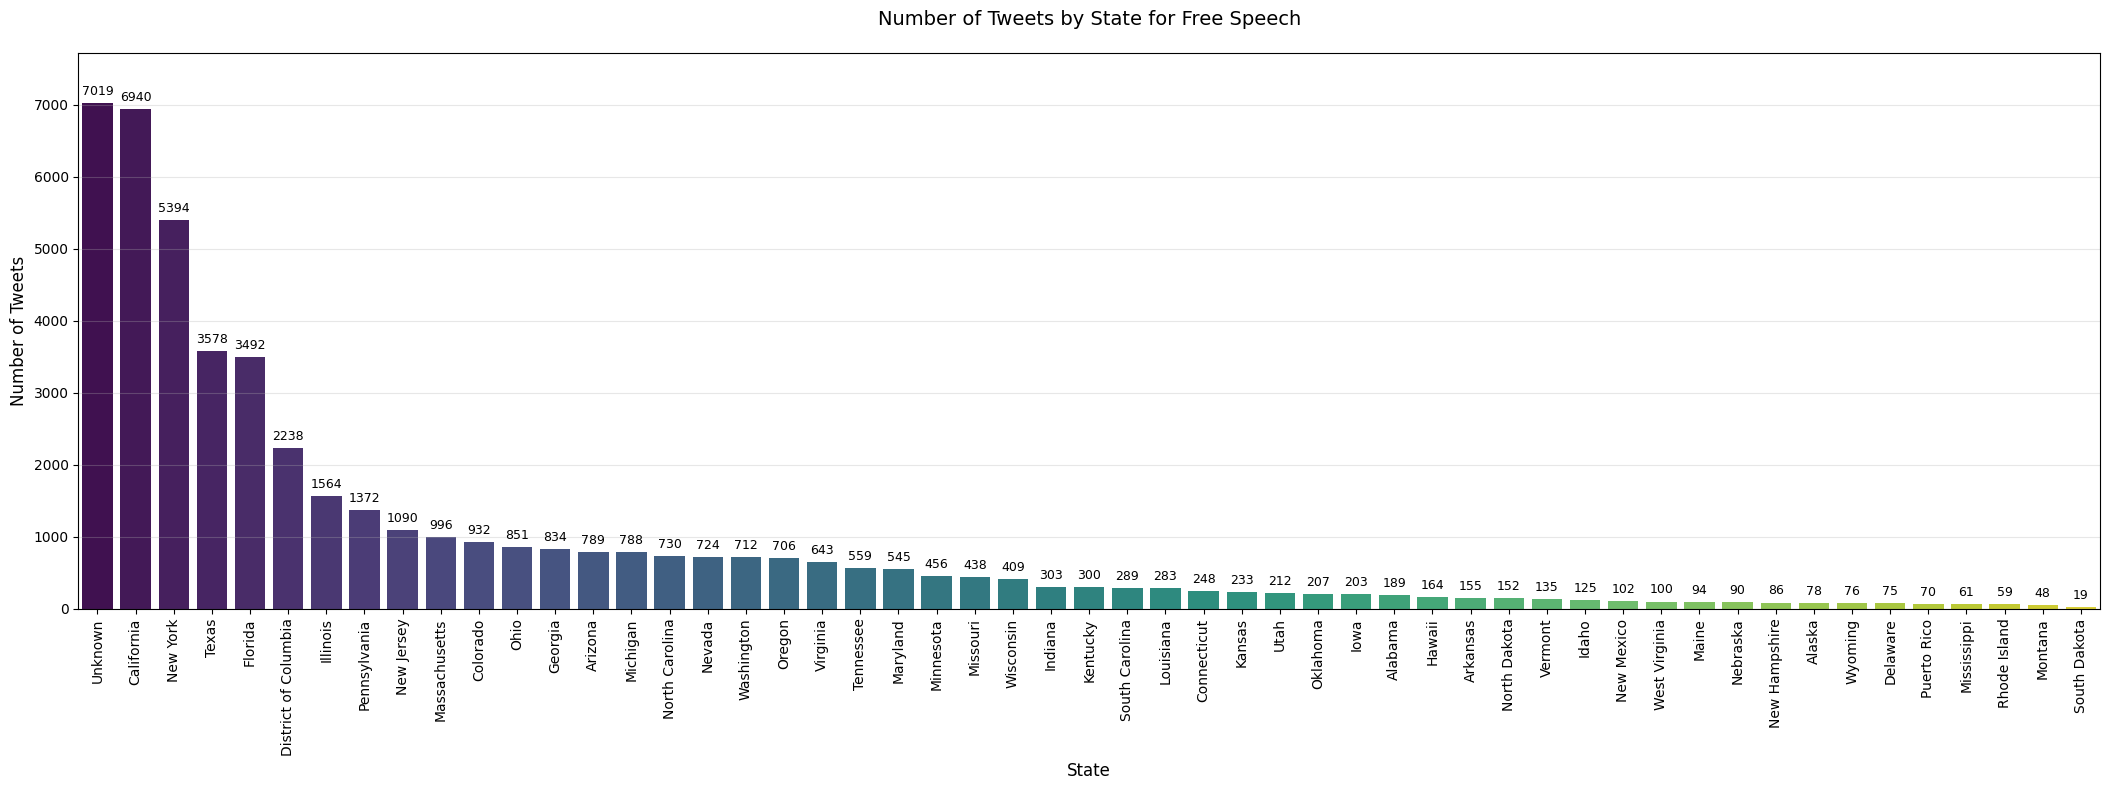

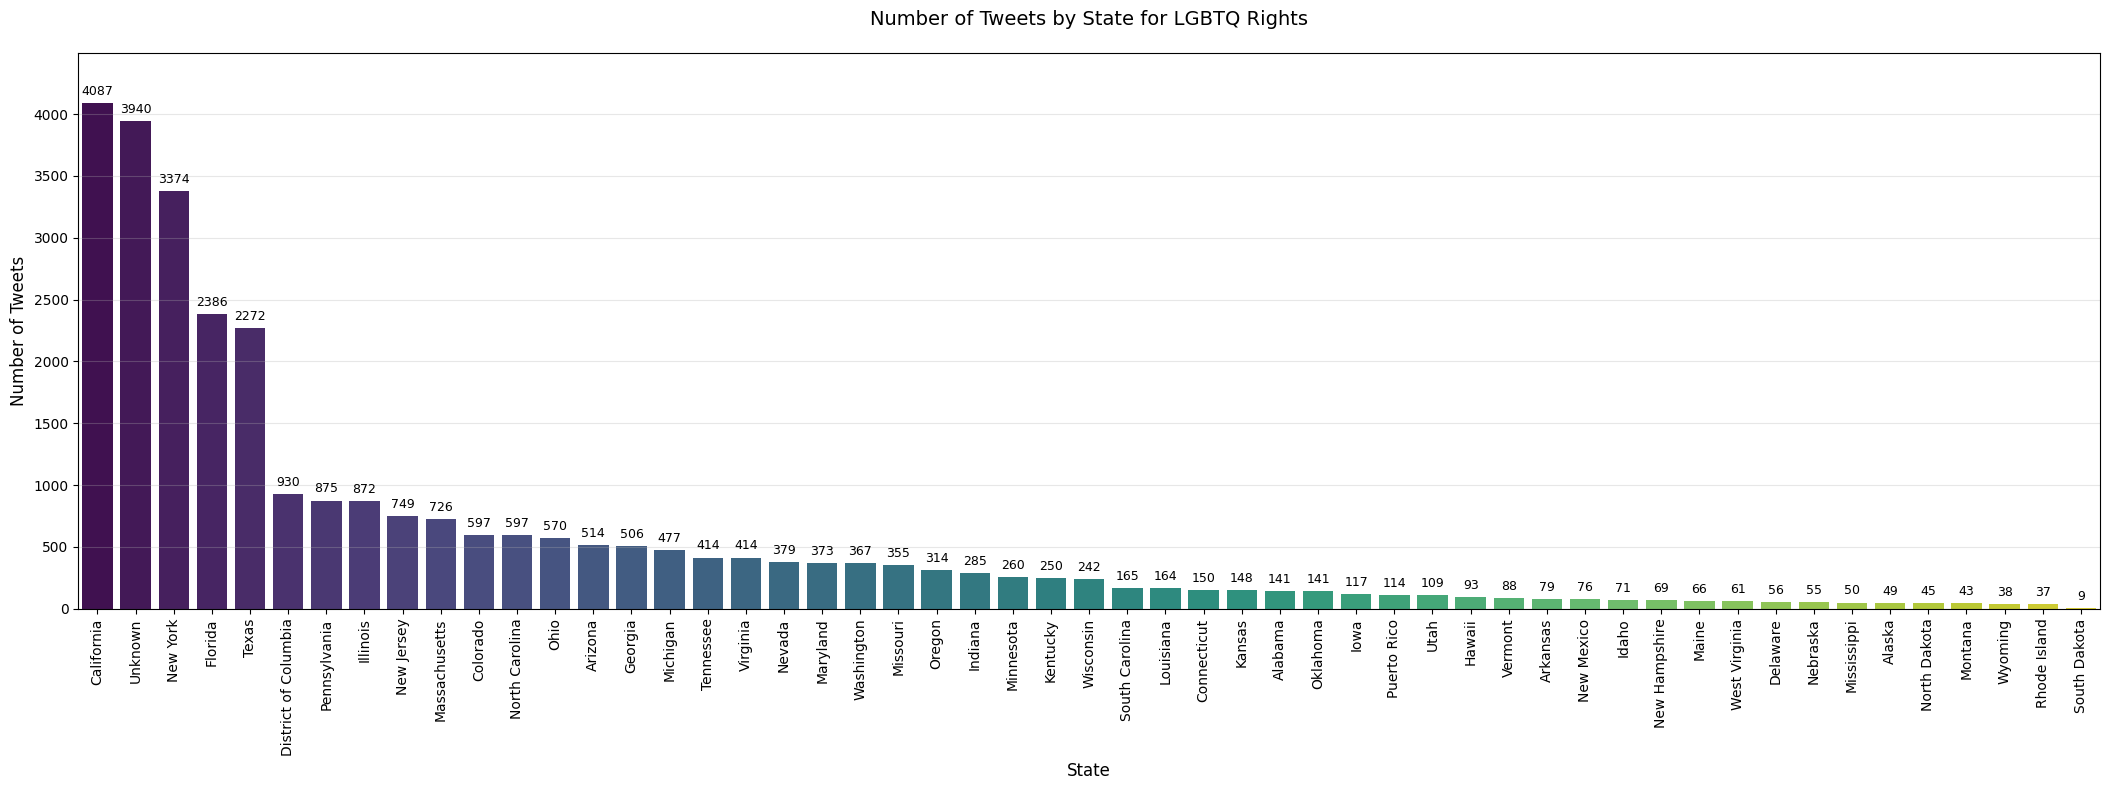

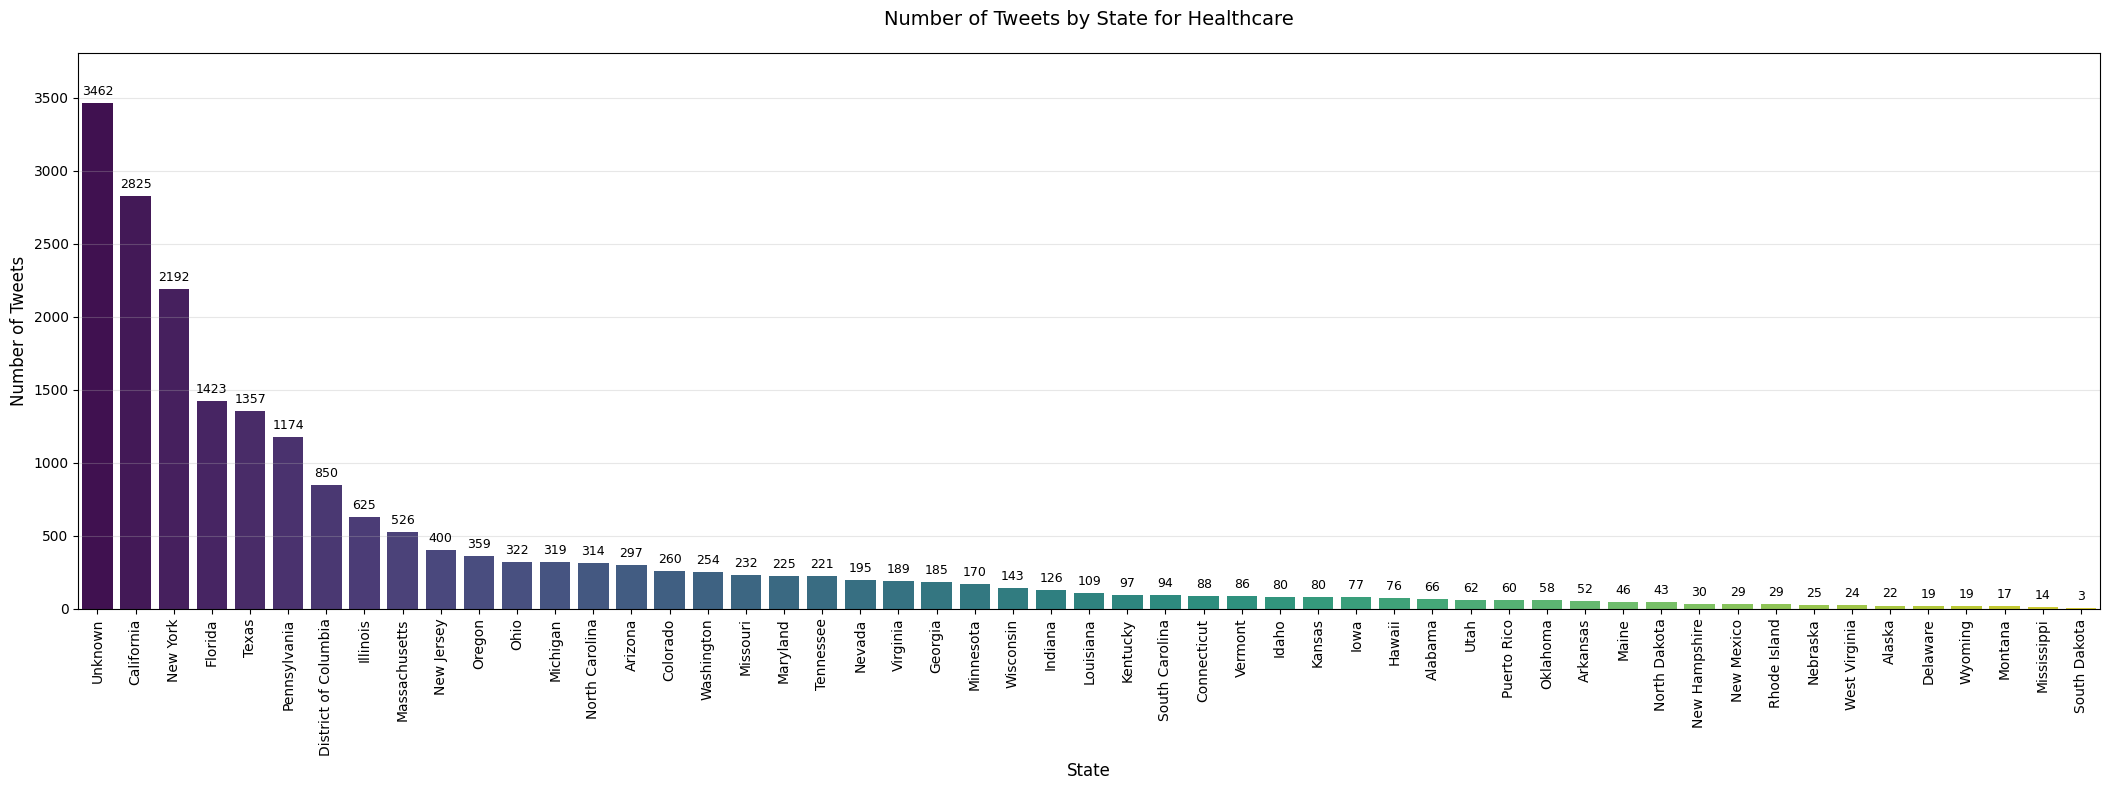

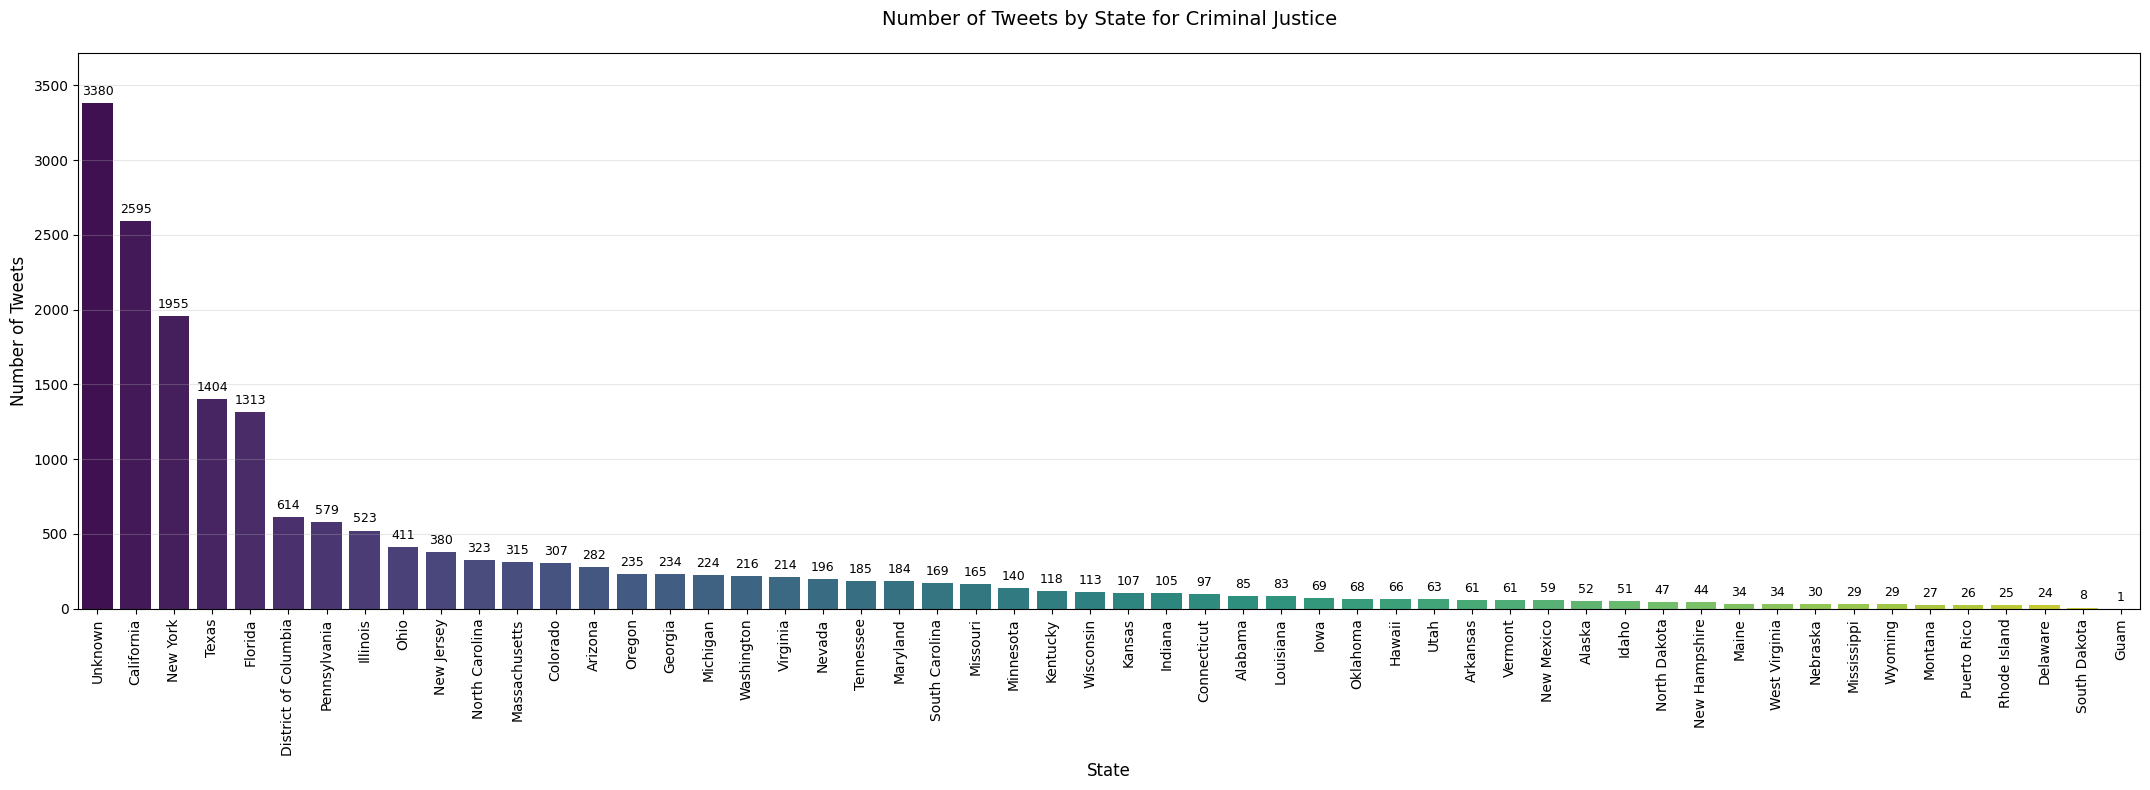

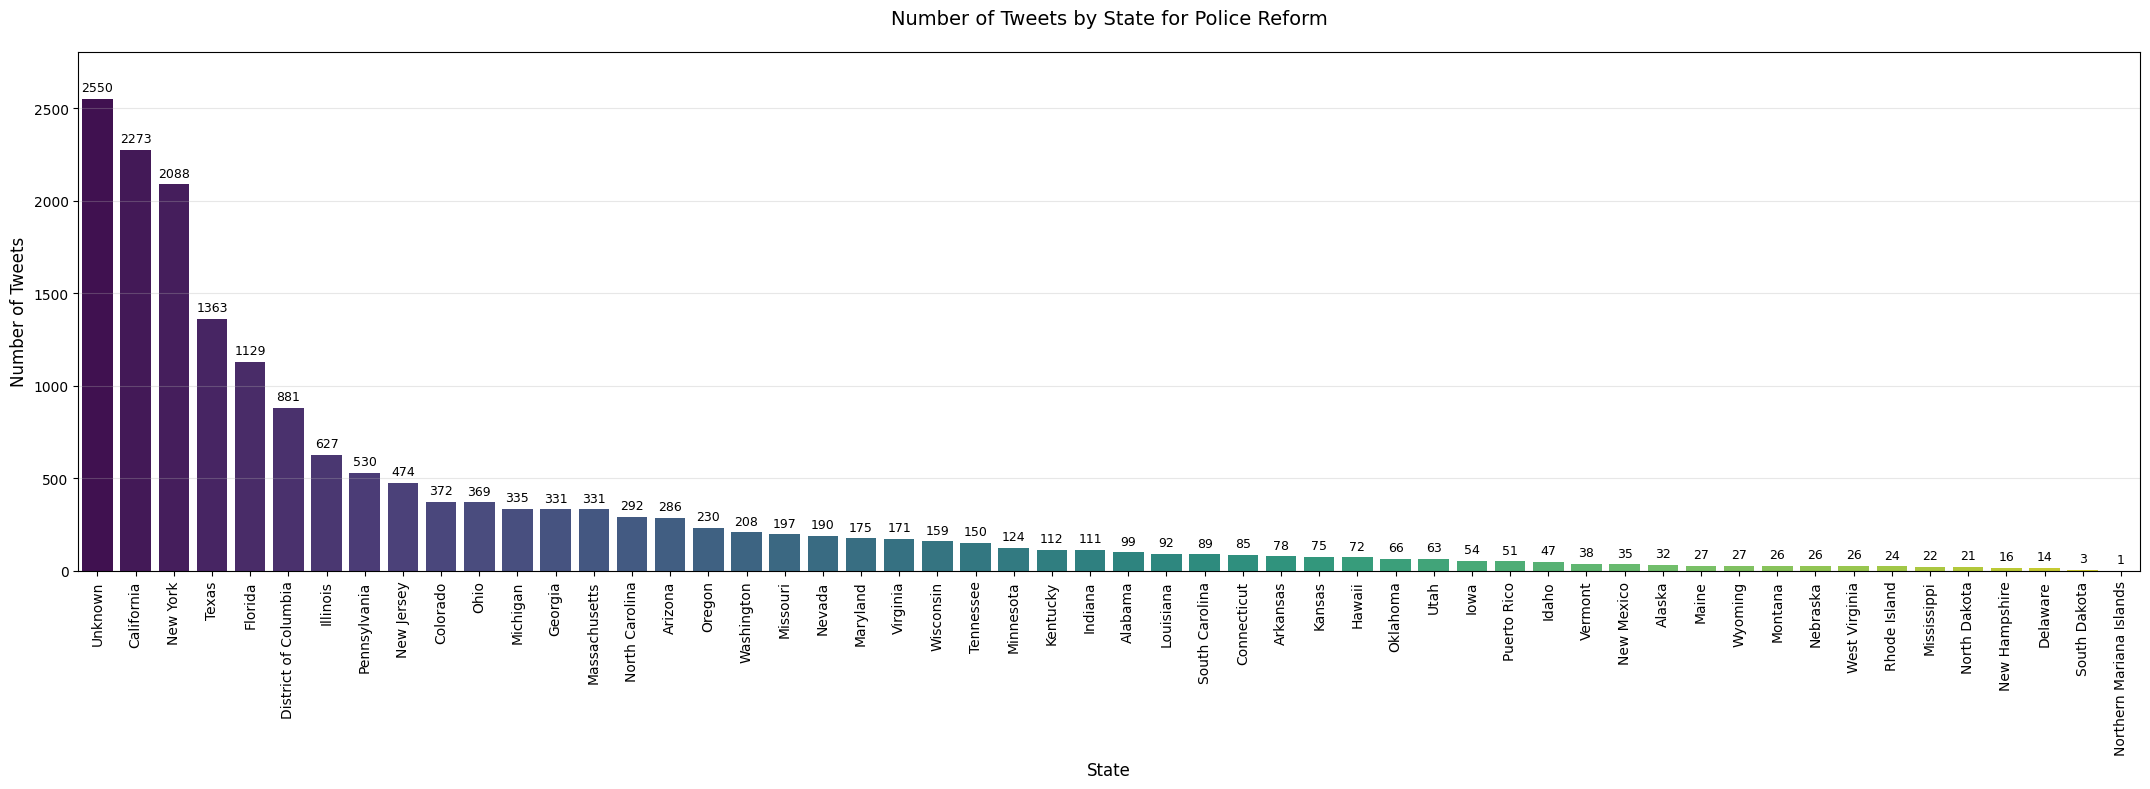

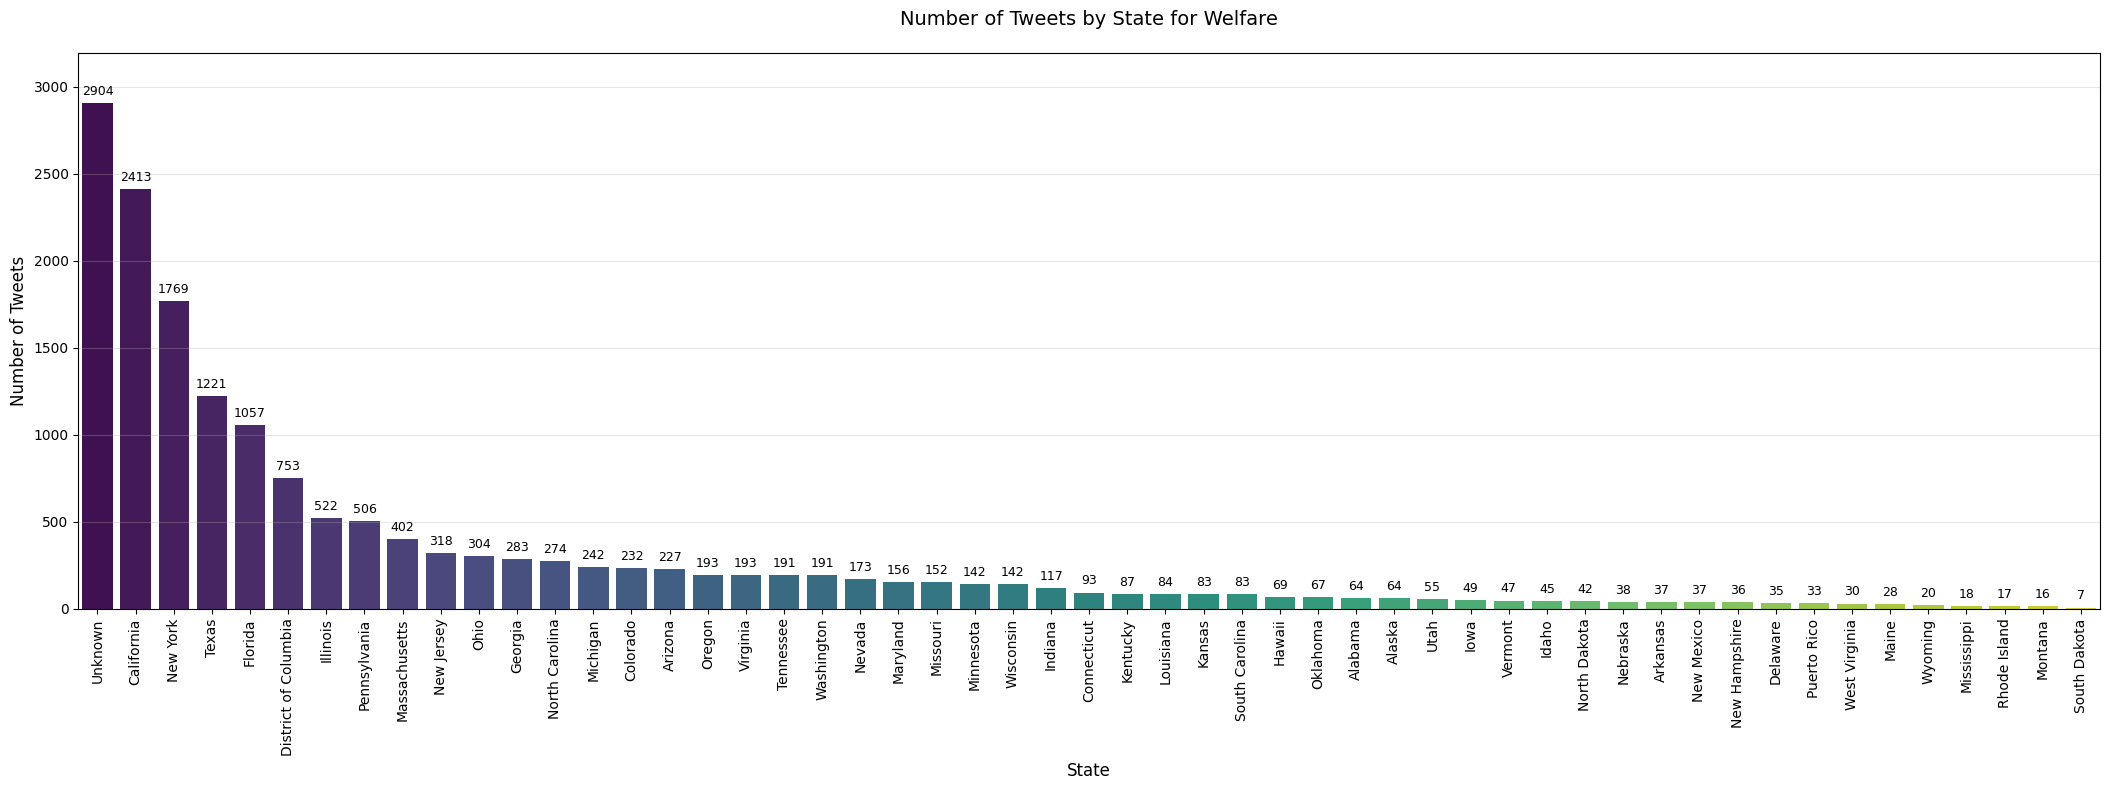

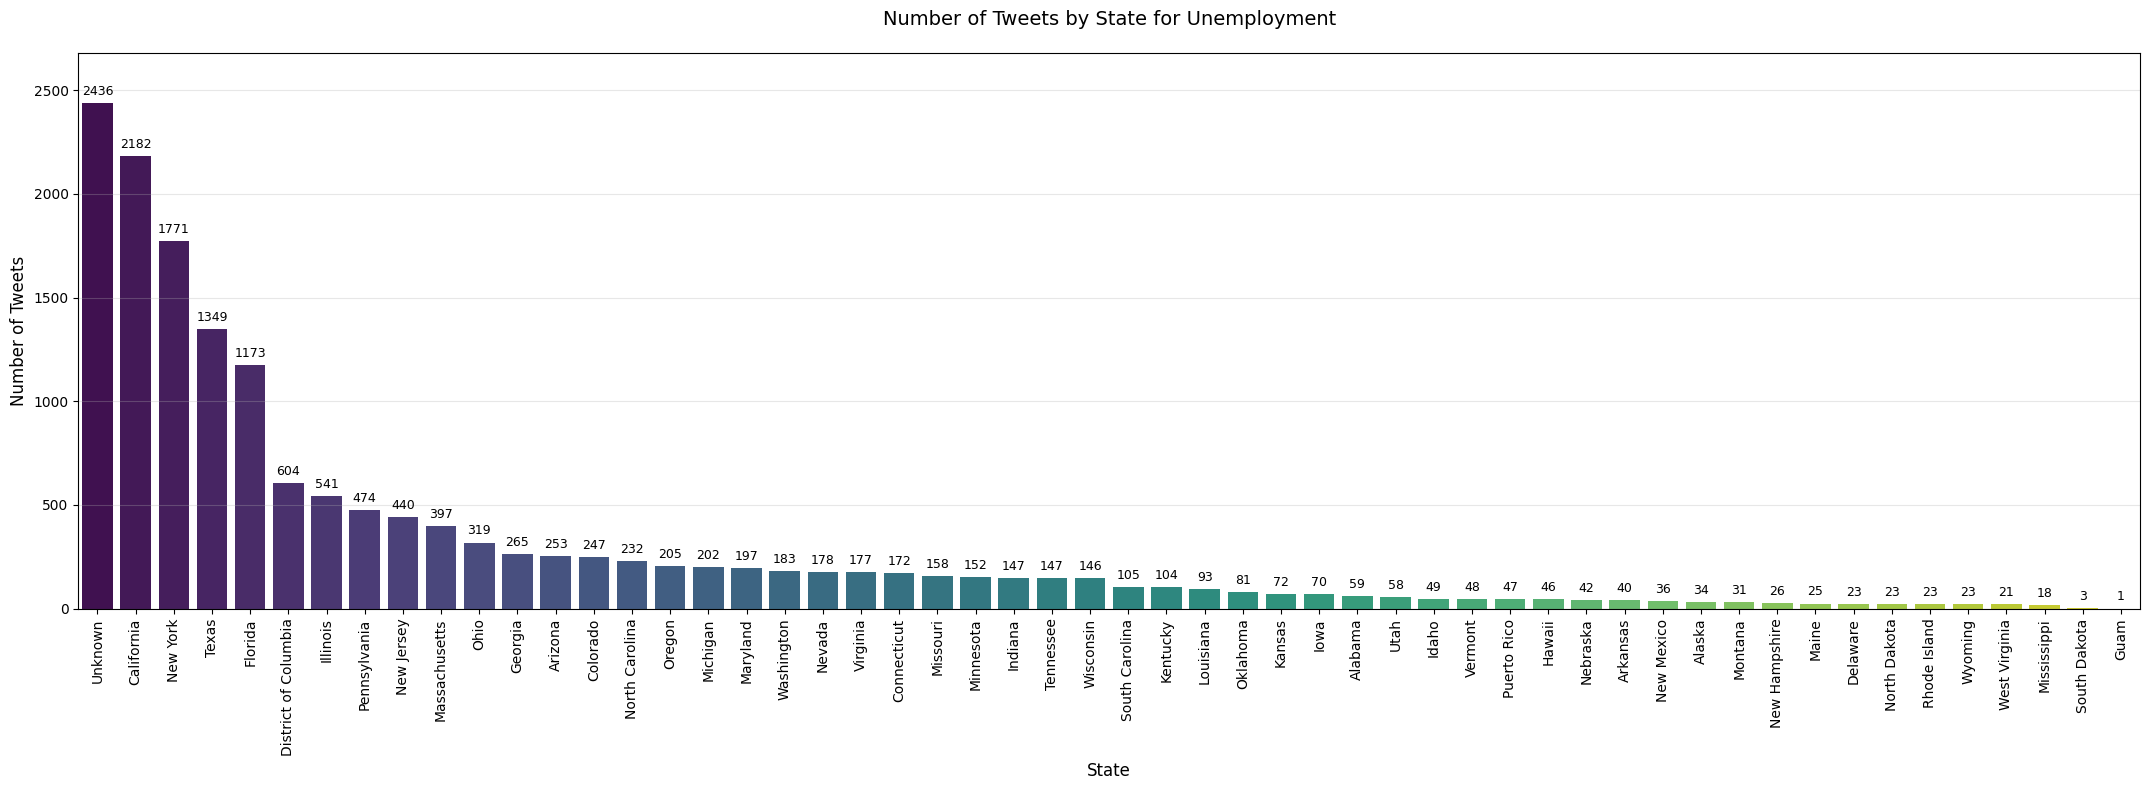

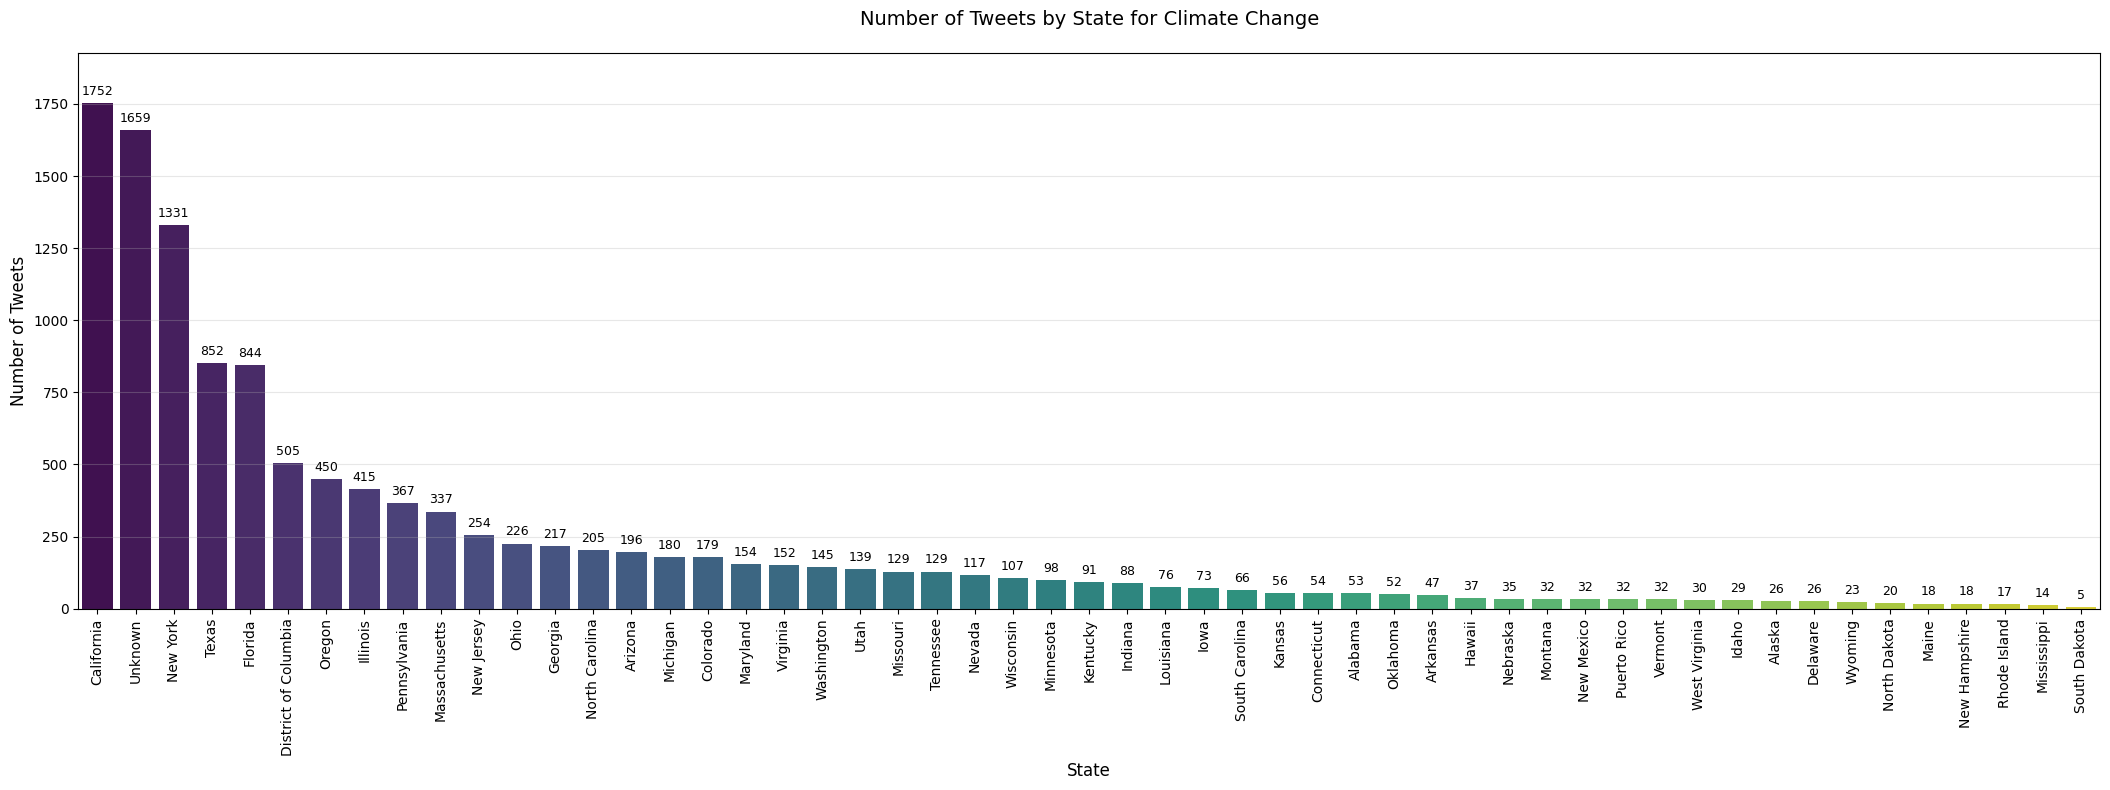

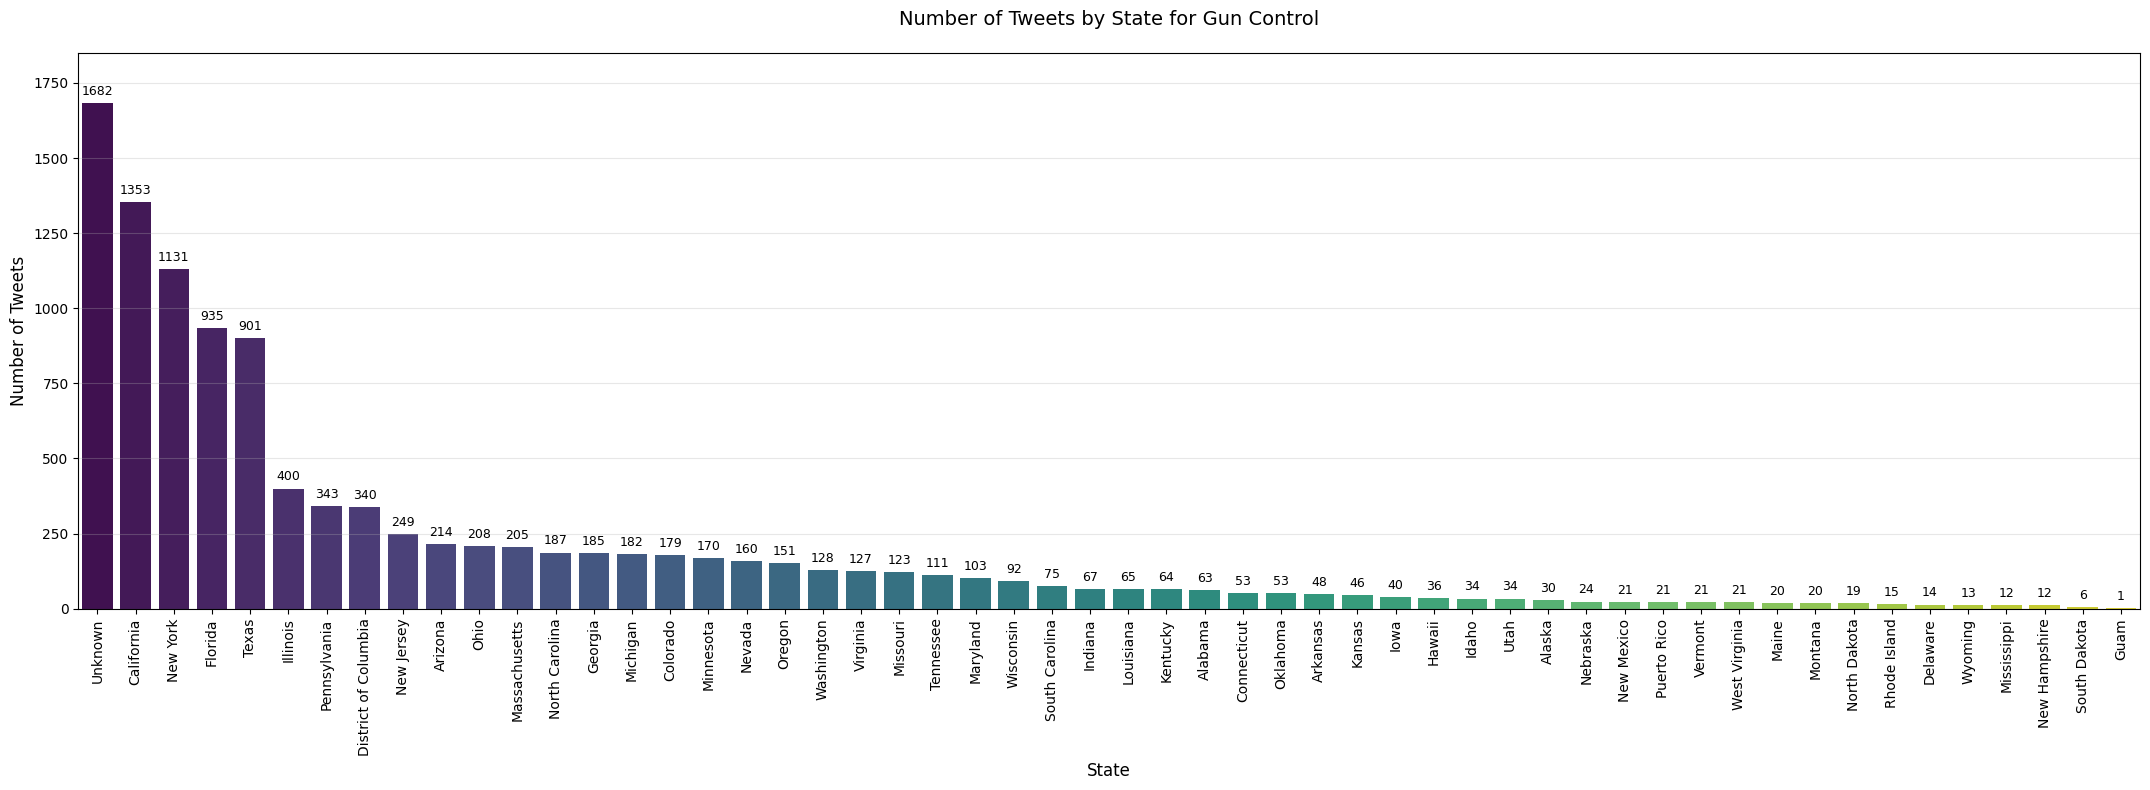

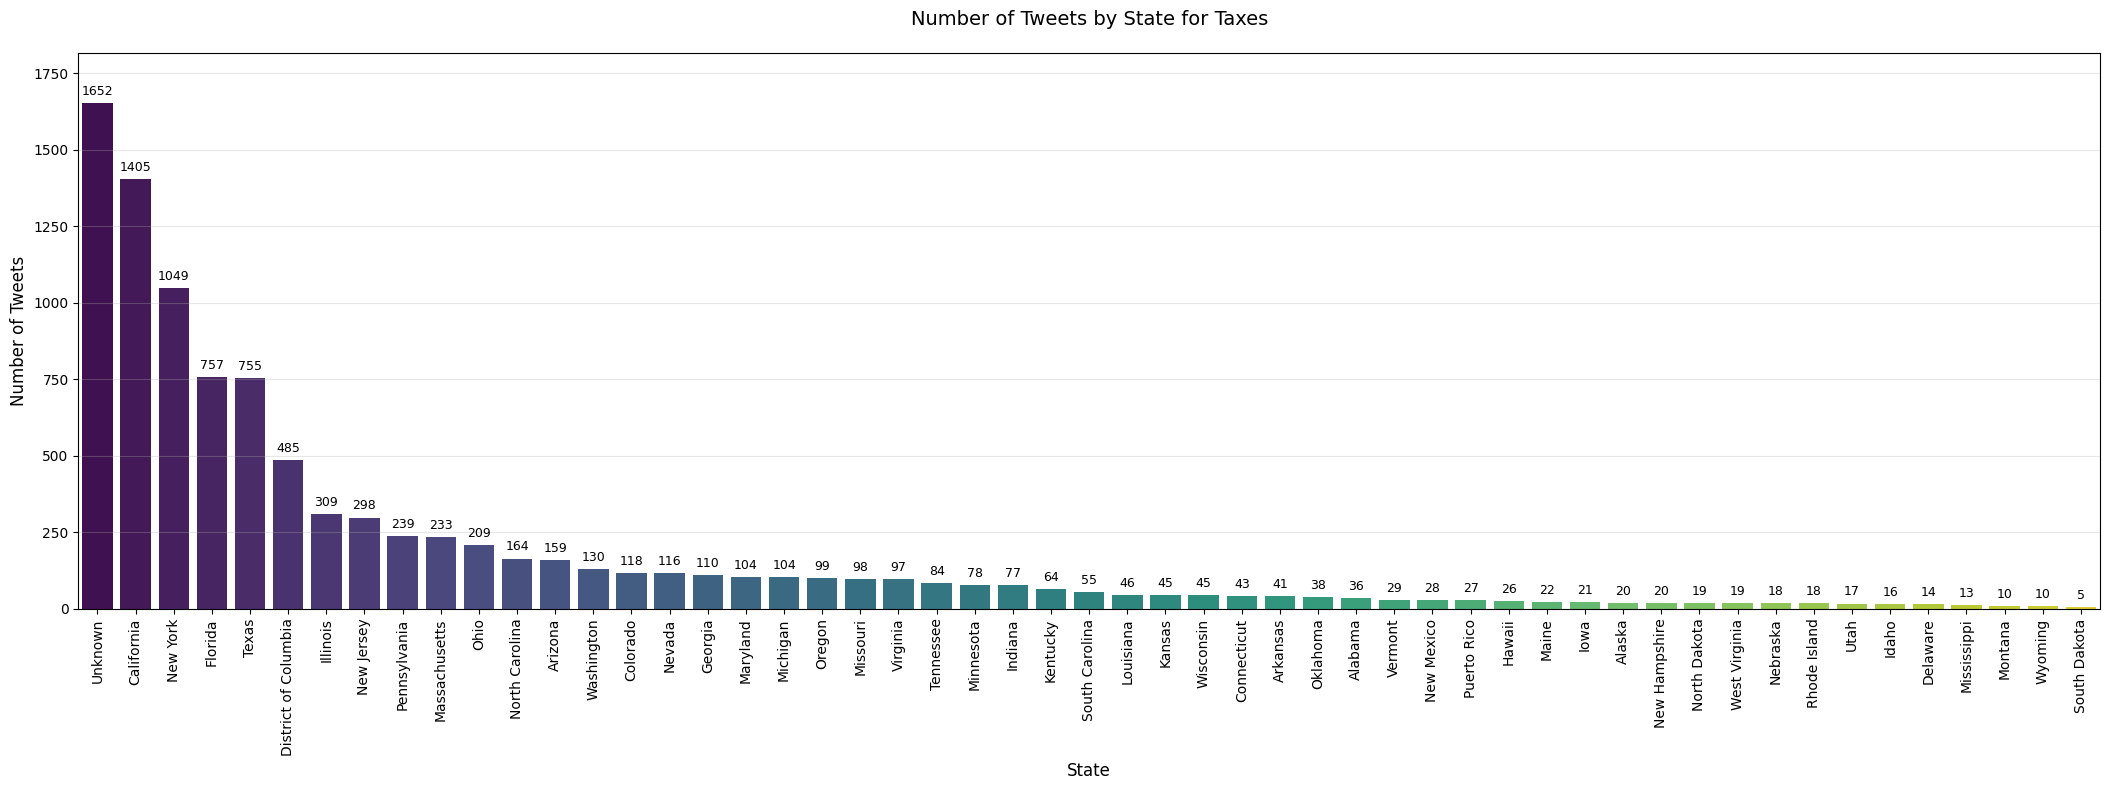

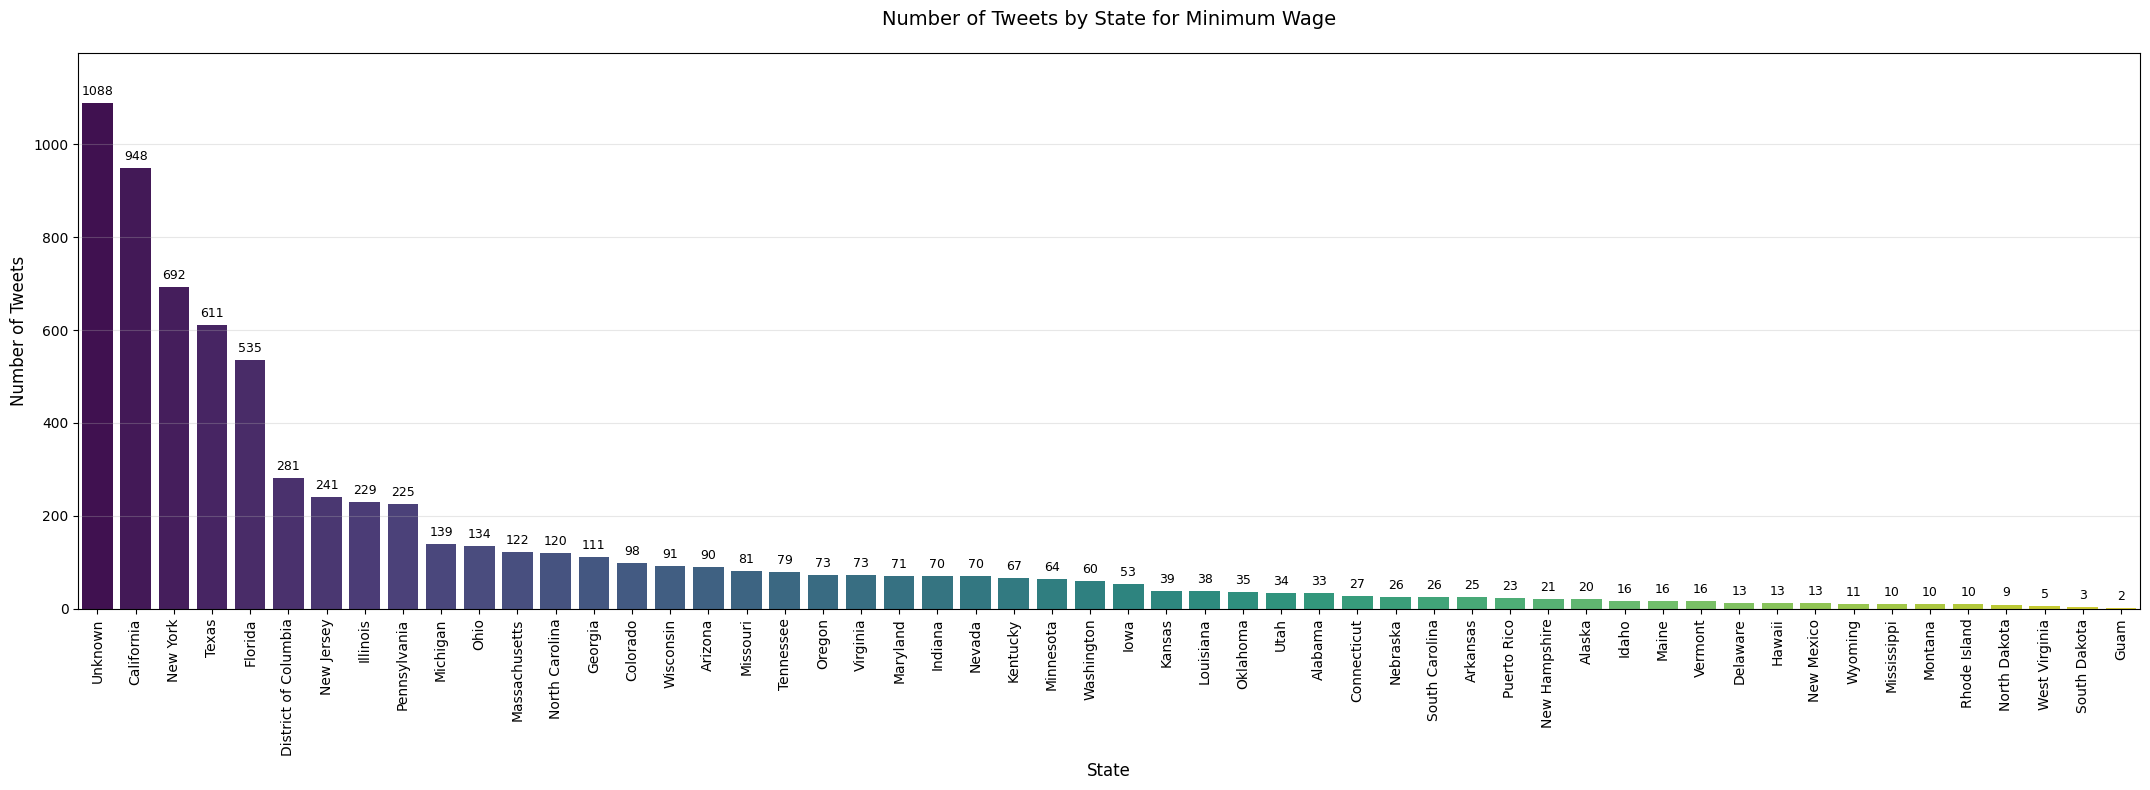

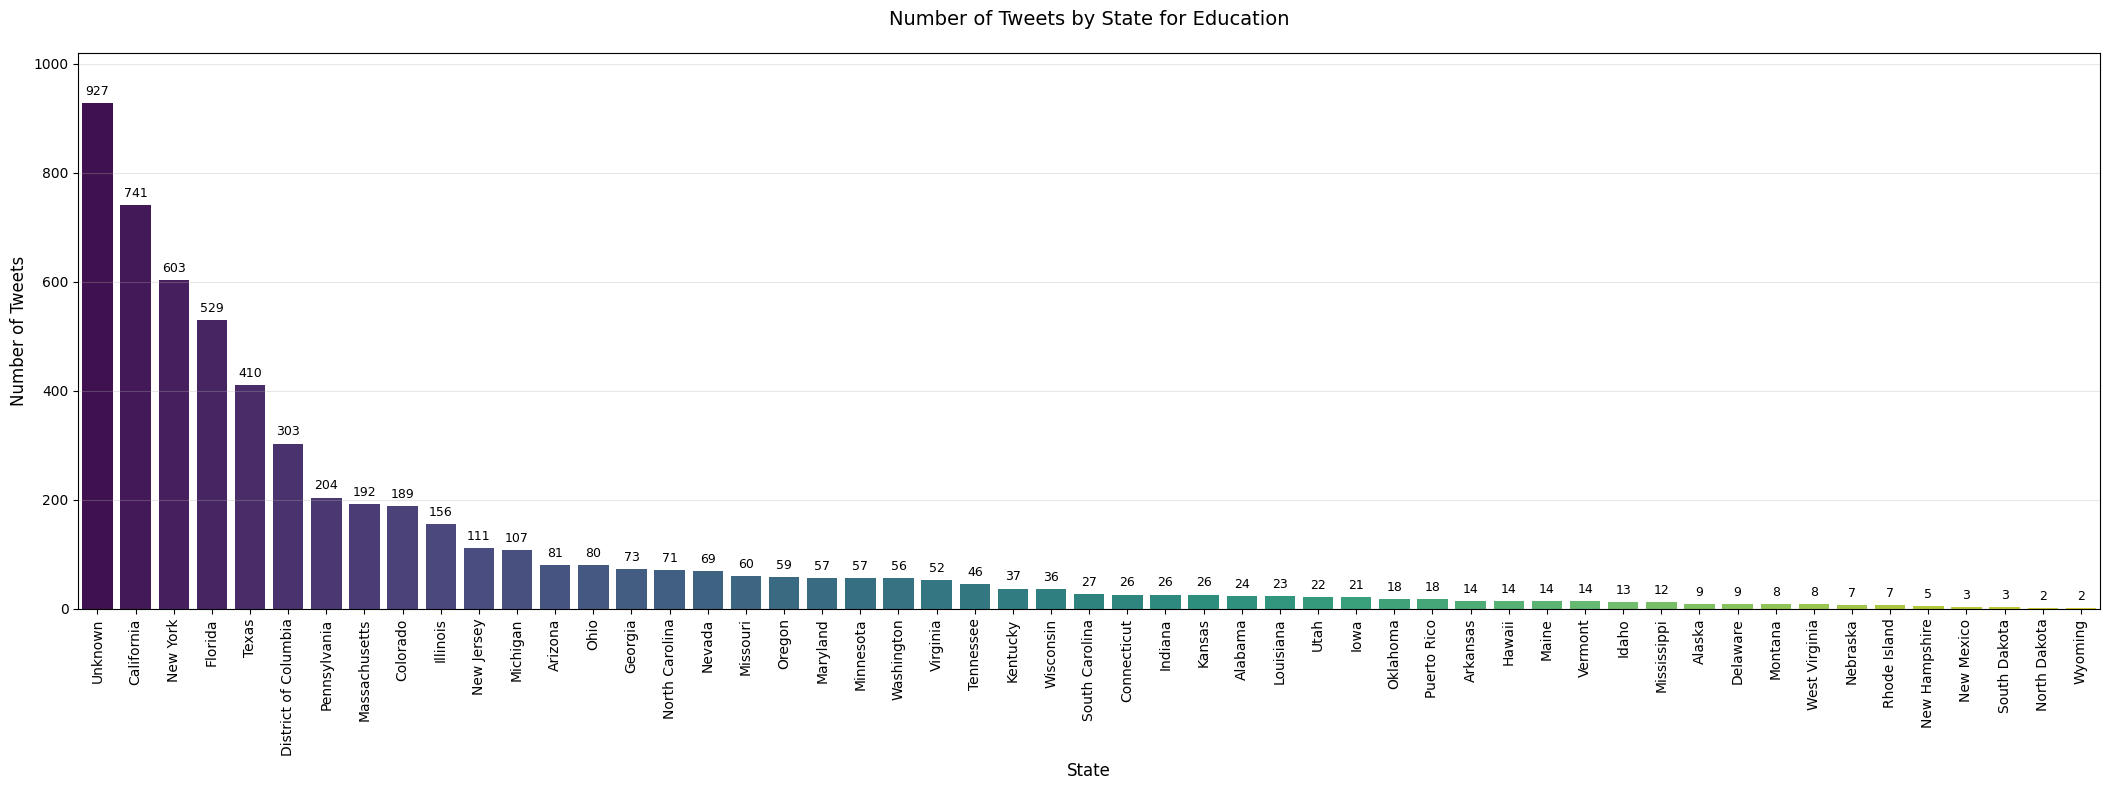

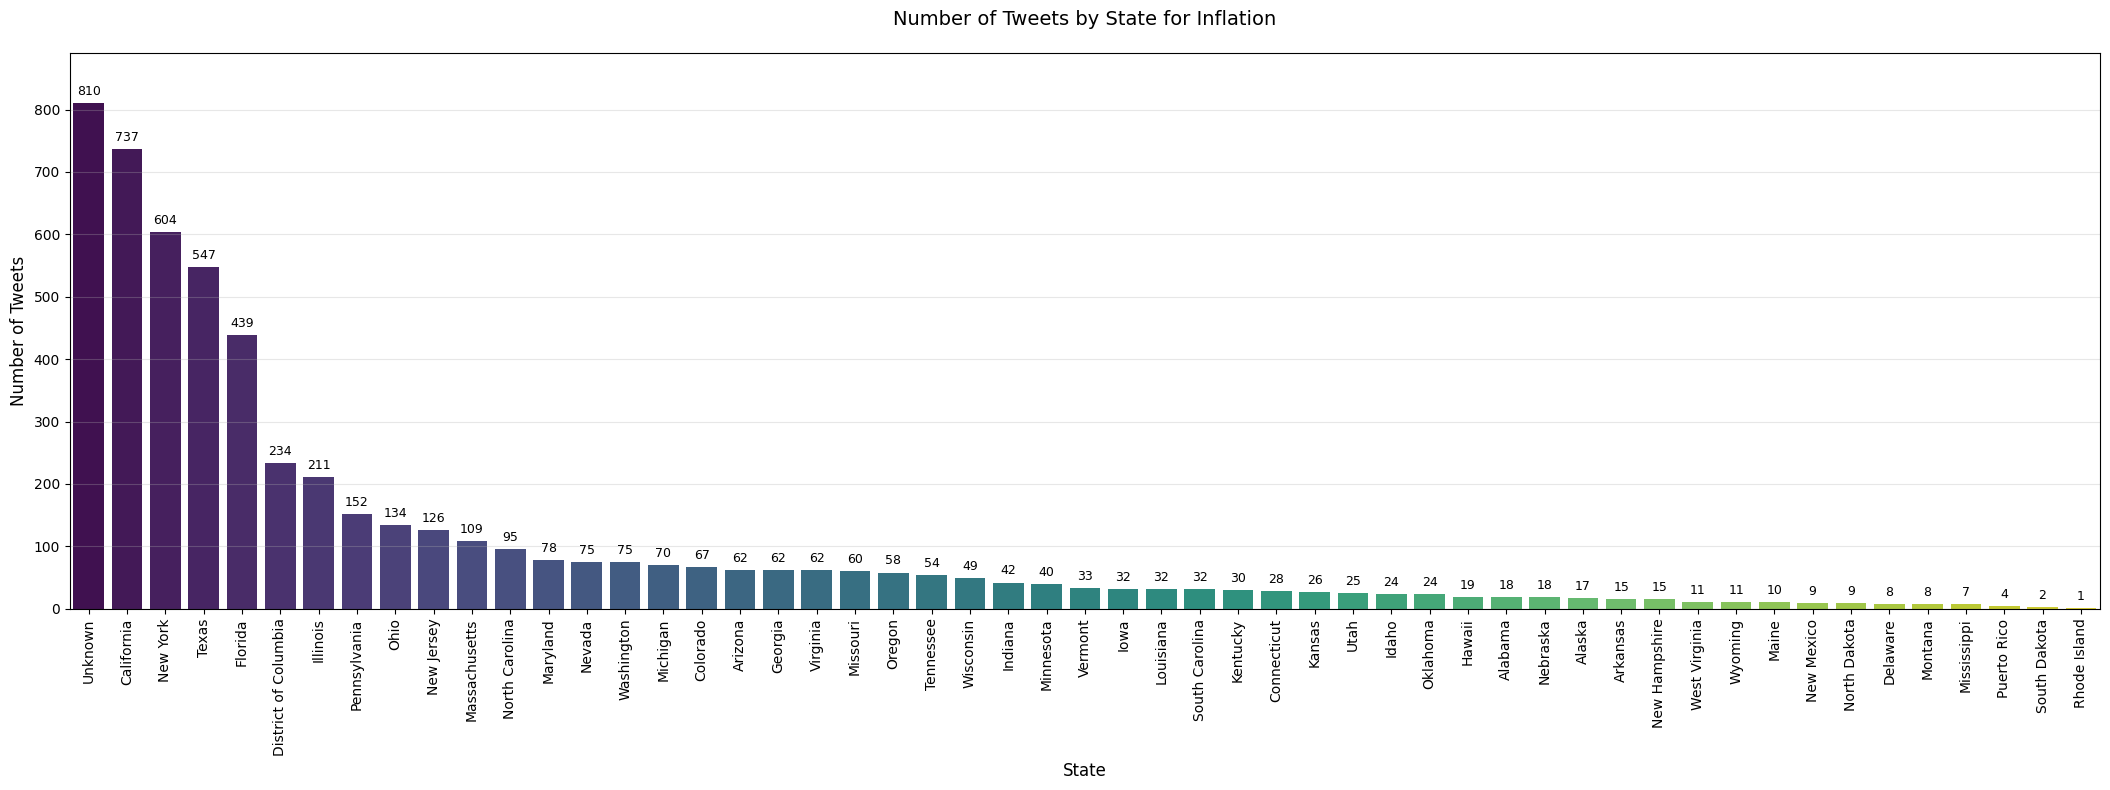

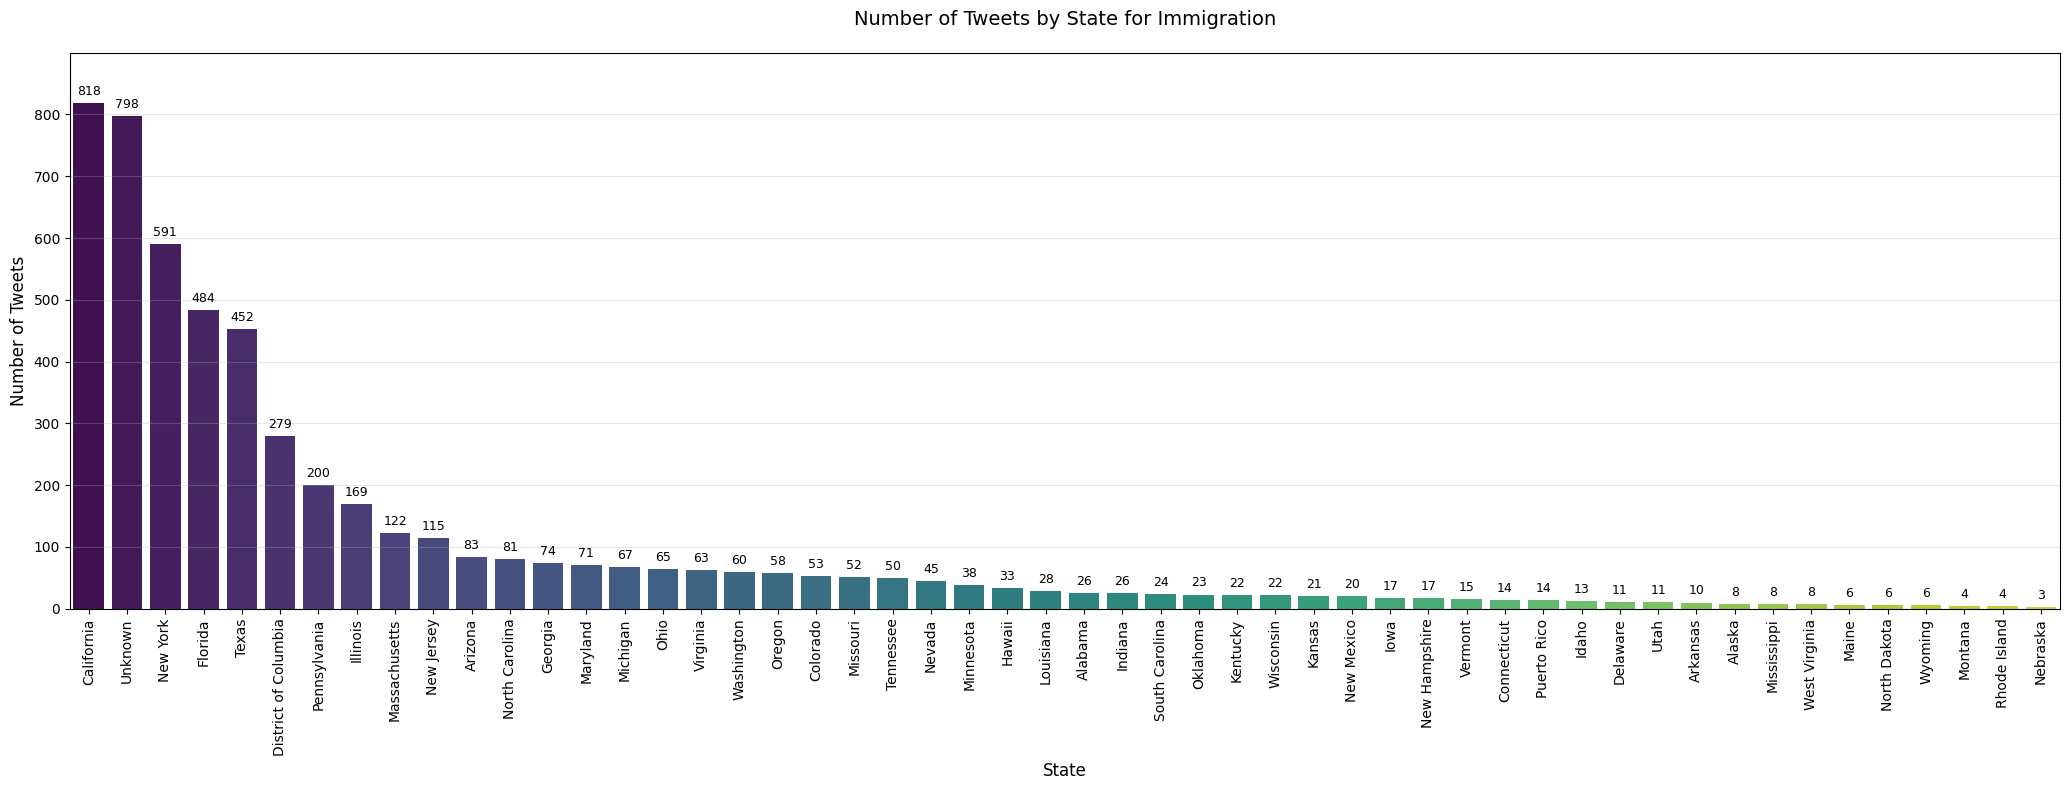

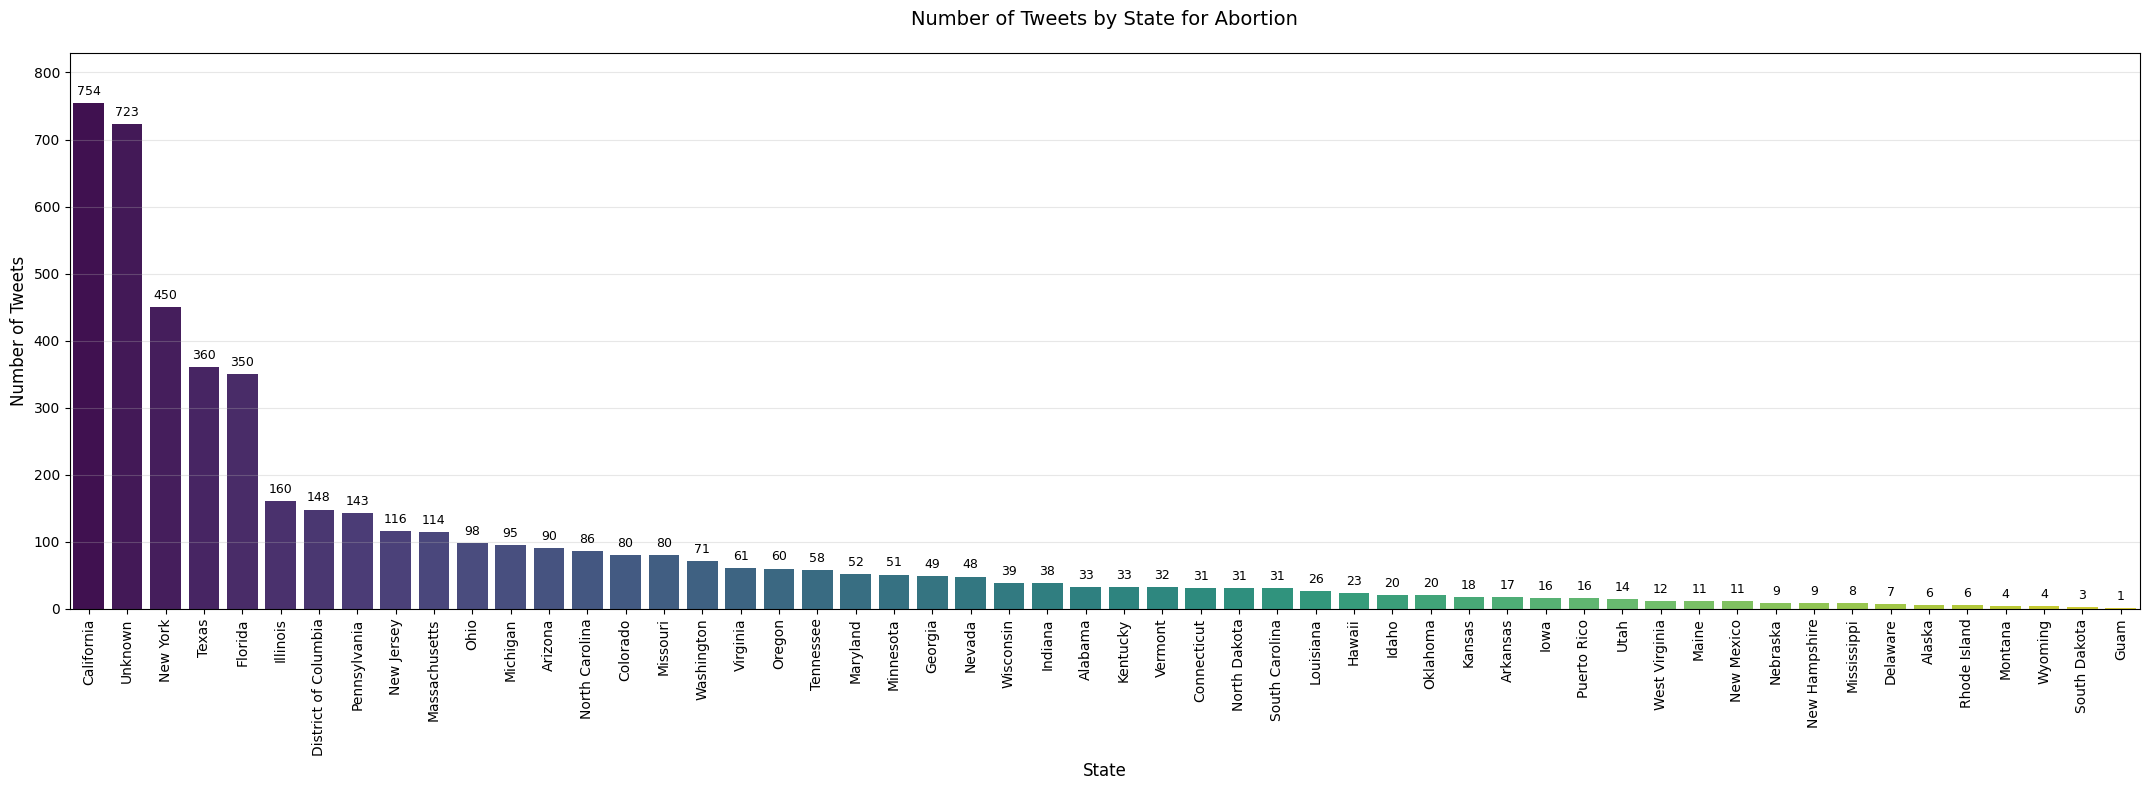

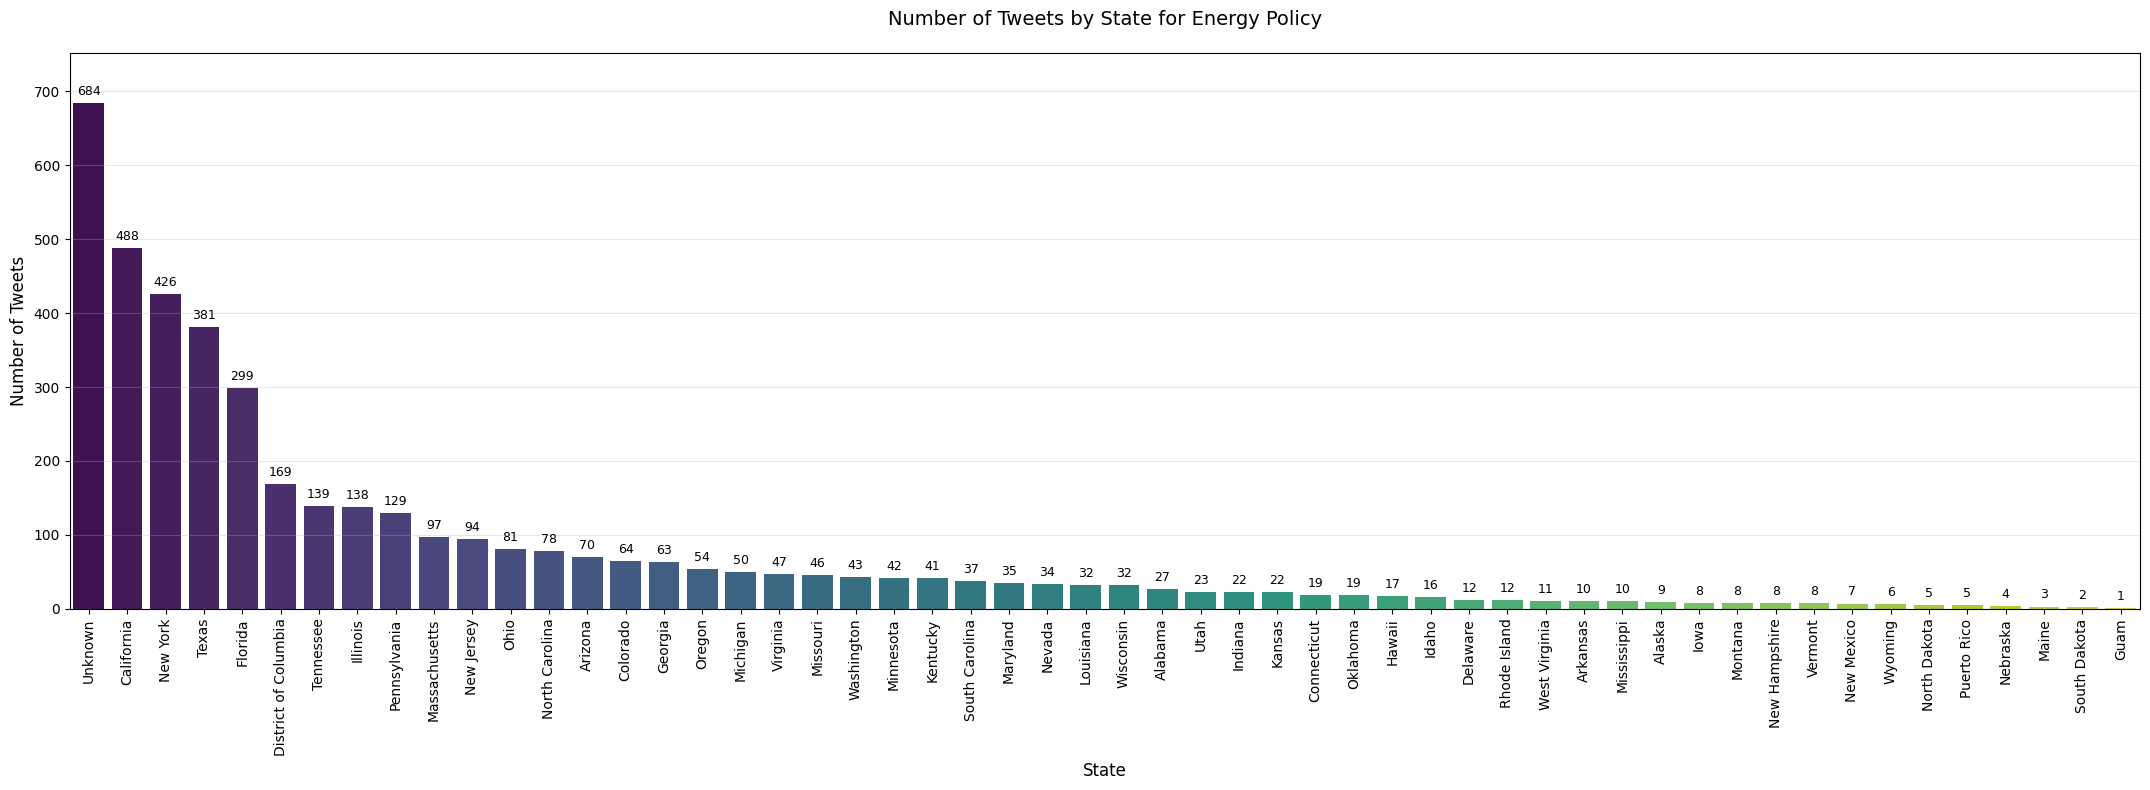

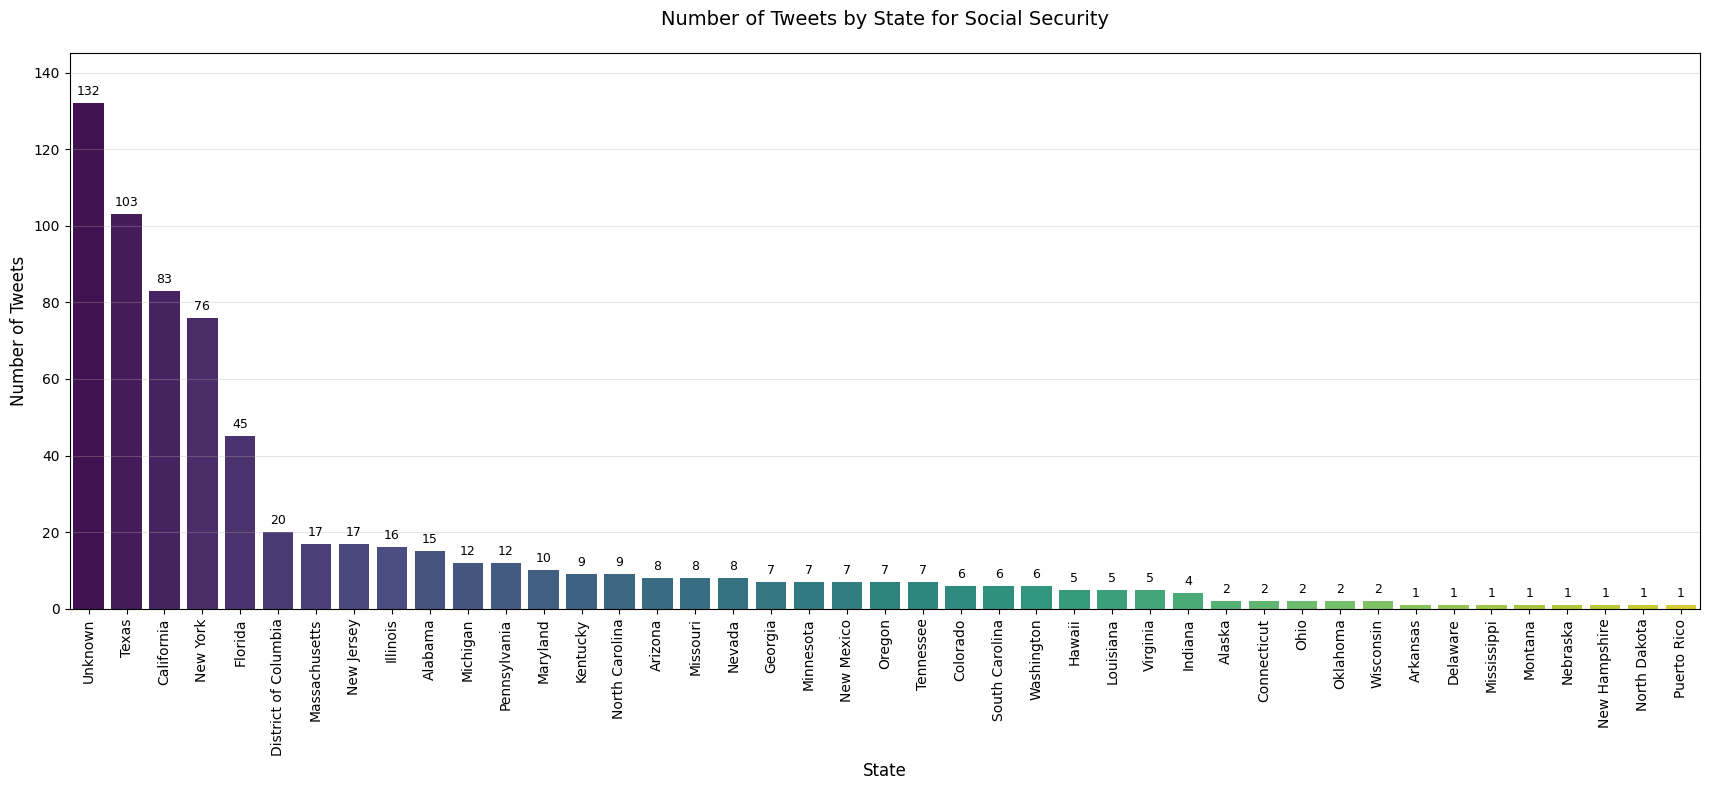

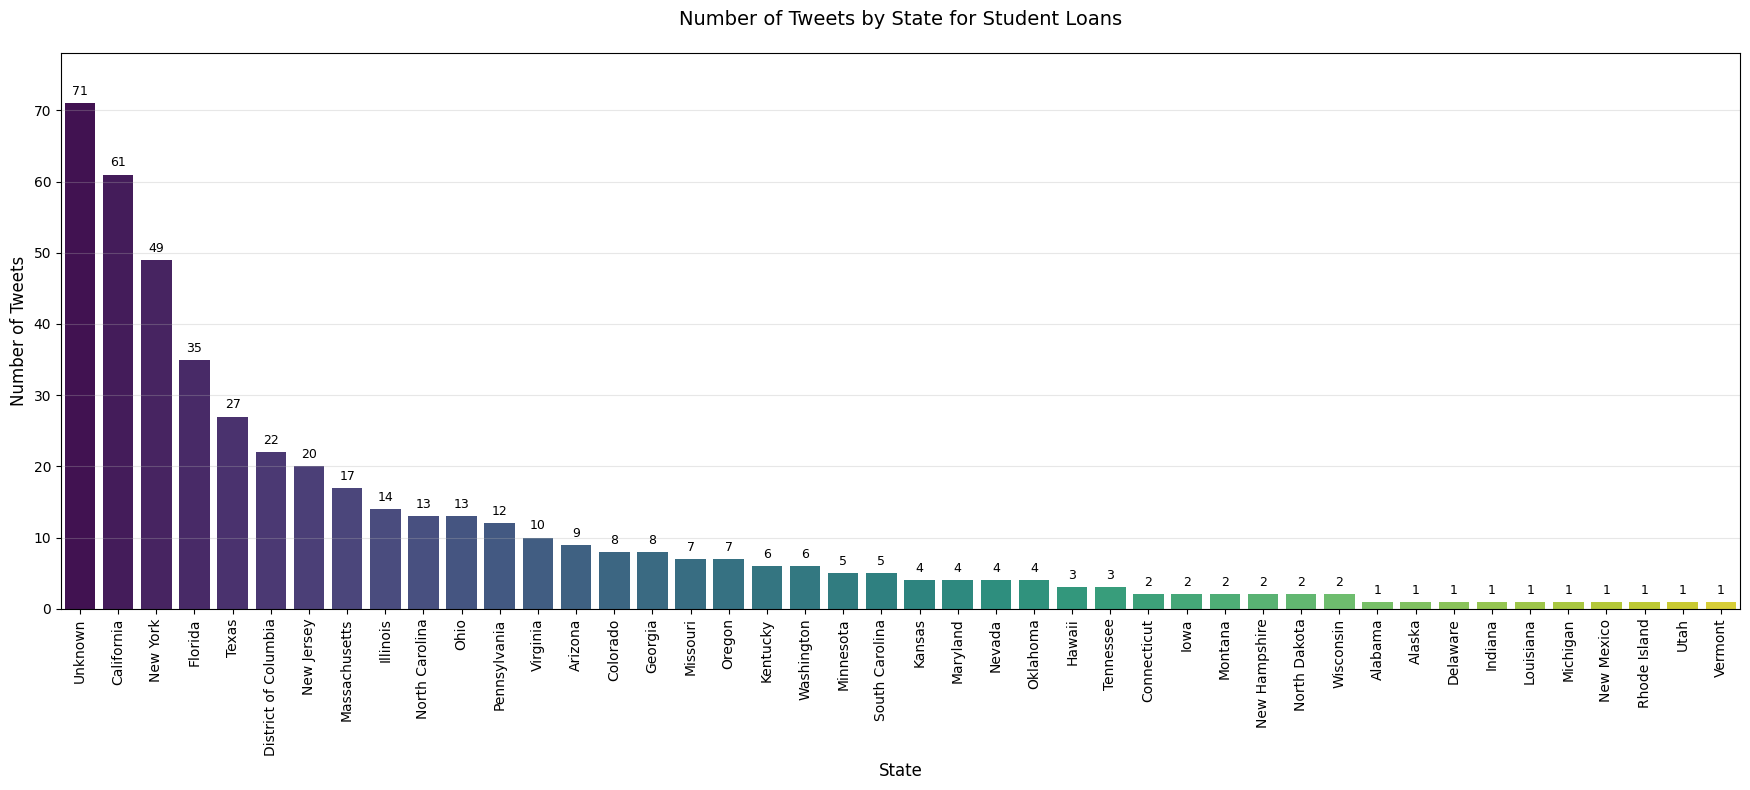

In [72]:
# Save each graph as a PNG file in a folder named v_b64_graphs in the data directory and label it with the political label, if the folder does not exist, create it
if not os.path.exists("../data/v_b64_nf_graphs"):
    os.makedirs("../data/v_b64_nf_graphs")

counter = 1
for political_label in political_groups.index:
    # Get data for the current political label
    data = grouped_by_state[grouped_by_state["political_label"] == political_label].copy()
    
    # Sort by tweet count for better visualization
    data = data.sort_values("tweet_count", ascending=False)
    
    # Create figure with appropriate size based on number of states
    plt.figure(figsize=(max(12, len(data) * 0.4), 8))
    
    # Create barplot with seaborn
    ax = sns.barplot(x="state", y="tweet_count", hue="state", data=data, palette="viridis", legend=False)
    
    # Get the maximum value to adjust the y-axis
    max_value = data["tweet_count"].max()
    
    # Extend y-axis to make room for labels (10% padding)
    ax.set_ylim(0, max_value * 1.1)
    
    # Add value labels just above each bar
    for i, bar in enumerate(ax.patches):
        bar_height = bar.get_height()
        # Position labels just slightly above each bar
        ax.text(
            bar.get_x() + bar.get_width()/2,
            bar_height + (max_value * 0.01),  # Small offset (1% of max height)
            f'{int(bar_height)}',
            ha='center', va='bottom',
            fontsize=9, color='black',
            rotation=0
        )
    
    plt.xlabel("State", fontsize=12)
    plt.ylabel("Number of Tweets", fontsize=12)
    plt.title(f"Number of Tweets by State for {political_label}", fontsize=14, pad=20)
    plt.xticks(rotation=90)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"../data/v_b64_nf_graphs/{counter} {political_label}.png", bbox_inches='tight', dpi=100)
    plt.show()
    counter += 1